In [1]:
#Agency Spending Notebook
import requests
import json
import numpy as np
import pandas as pd
import zipfile as z
import matplotlib.pyplot as plt

In [2]:
#add the directories to a list for later on
zip_directories = ['2014_Contracts.zip', '2016_Contracts.zip', '2018_Contracts.zip']

#gets files from from zipfiles
spending_14_folder = z.ZipFile(zip_directories[0], 'r')
spending_16_folder = z.ZipFile(zip_directories[1], 'r')
spending_18_folder = z.ZipFile(zip_directories[2], 'r')

spending_folders = [spending_14_folder, spending_16_folder, spending_18_folder]

In [3]:
#next using the namelist method from this handy website: https://thispointer.com/python-how-to-get-the-list-of-all-files-in-a-zip-archive/
#we'll assemble all of the 2014 csvs into one dataframe. A note was added in the above site to use "with" when dealing with zips. This was a good idea.
spending_14_list = []
spending_14_csv_list = []
counter = 0

with spending_14_folder:
    files = spending_14_folder.namelist()
    for file in files:
        spending_14_list.append(spending_14_folder.open(file))
    for n in range(0,len(spending_14_list)):
        current_14_csv = pd.read_csv(spending_14_list[0])
        del spending_14_list[0]
        spending_14_csv = current_14_csv[['awarding_agency_name','funding_agency_name', 'recipient_state_code', 'recipient_state_name', 'primary_place_of_performance_state_code', 'total_dollars_obligated', 'current_total_value_of_award','potential_total_value_of_award']].dropna()
        spending_14_csv_list.append(spending_14_csv)
        
spending_14_clean = pd.concat(csv for csv in spending_14_csv_list)
del spending_14_csv_list  
    

C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,44,49,53,55,56,63,95,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,44,49,53,55,56,63,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,34,35,43,44,49,53,55,56,63,95,115,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
spending_14_csv.head()

,awarding_agency_name,funding_agency_name,recipient_state_code,recipient_state_name,primary_place_of_performance_state_code,total_dollars_obligated,current_total_value_of_award,potential_total_value_of_award
2,DEPARTMENT OF DEFENSE (DOD),DEPARTMENT OF DEFENSE (DOD),PA,PENNSYLVANIA,PA,9202.50,9202.50,9202.50
3,DEPARTMENT OF DEFENSE (DOD),DEPARTMENT OF DEFENSE (DOD),NY,NEW YORK,NY,9348.60,9348.60,9348.60
9,DEPARTMENT OF DEFENSE (DOD),DEPARTMENT OF DEFENSE (DOD),CT,CONNECTICUT,CT,5425.76,5425.76,5425.76
19,DEPARTMENT OF DEFENSE (DOD),DEPARTMENT OF DEFENSE (DOD),VT,VERMONT,VT,5100.00,5100.00,5100.00
20,BROADCASTING BOARD OF GOVERNORS (BBG),BROADCASTING BOARD OF GOVERNORS (BBG),MD,MARYLAND,DC,11050.00,11050.00,11050.00


In [5]:
spending_14_clean.head()
spending_14_states_grouped = spending_14_clean.groupby(["recipient_state_code", "funding_agency_name"]).sum()
spending_14_states_grouped.head()

total_dollars_obligated  \
recipient_state_code funding_agency_name                                                      
AK                   CORPS OF ENGINEERS - CIVIL WORKS (USACE)                  4.313503e+07   
                     DEPARTMENT OF AGRICULTURE (USDA)                          1.144753e+07   
                     DEPARTMENT OF COMMERCE (DOC)                              2.168937e+07   
                     DEPARTMENT OF DEFENSE (DOD)                               2.119749e+09   
                     DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)             2.764570e+07   

                                                                    current_total_value_of_award  \
recipient_state_code funding_agency_name                                                           
AK                   CORPS OF ENGINEERS - CIVIL WORKS (USACE)                       4.313503e+07   
                     DEPARTMENT OF AGRICULTURE (USDA)                               1.144753e+07   
                     DEPARTMENT OF COMMERCE (DOC)                                   2.168937e+07   
                     DEPARTMENT OF DEFENSE (DOD)                                    2.154356e+09   
                     DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)                  2.764570e+07   

                                                                    potential_total_value_of_award  
recipient_state_code funding_agency_name                                                            
AK                   CORPS OF ENGINEERS - CIVIL WORKS (USACE)                         4.345972e+07  
                     DEPARTMENT OF AGRICULTURE (USDA)                                 1.144753e+07  
                     DEPARTMENT OF COMMERCE (DOC)                                     2.252608e+07  
                     DEPARTMENT OF DEFENSE (DOD)                                      2.190123e+09  
                     DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)                    2.764570e+07

<function matplotlib.pyplot.show(*args, **kw)>

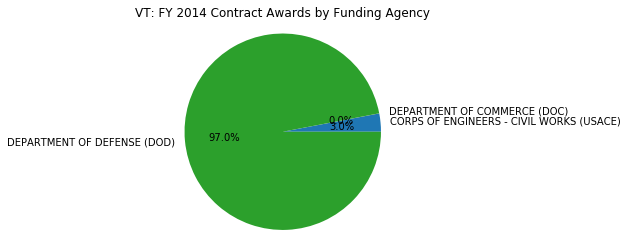

In [6]:
#this will have to create new dfs for the individual states we're looking at and then group the money by agency
vt_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "VT"]
vt_14_no_null = vt_14.dropna()
vt_14_agency = vt_14_no_null.groupby('funding_agency_name').sum()
vt_14_agency = vt_14_agency.reset_index()
vt_14_agency = vt_14_agency.head(3)
plt.pie(vt_14_agency['total_dollars_obligated'], labels = [value for value in vt_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("VT: FY 2014 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

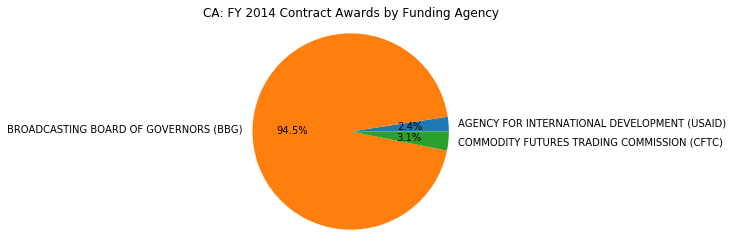

In [7]:
ca_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "CA"]
ca_14_no_null = ca_14.dropna()
ca_14_agency = ca_14_no_null.groupby('funding_agency_name').sum()
ca_14_agency = ca_14_agency.reset_index()
ca_14_agency = ca_14_agency.head(3)
plt.pie(ca_14_agency['total_dollars_obligated'], labels = [value for value in ca_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("CA: FY 2014 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

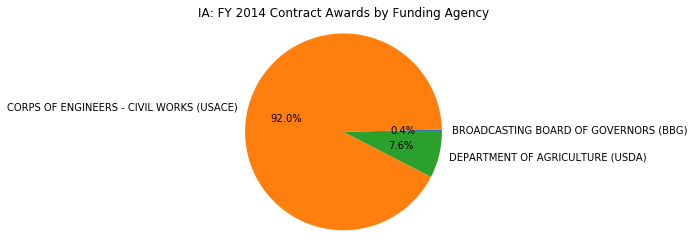

In [8]:
ia_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "IA"]
ia_14_no_null = ia_14.dropna()
ia_14_agency = ia_14_no_null.groupby('funding_agency_name').sum()
ia_14_agency = ia_14_agency.reset_index()
ia_14_agency = ia_14_agency.head(3)
plt.pie(ia_14_agency['total_dollars_obligated'], labels = [value for value in ia_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("IA: FY 2014 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

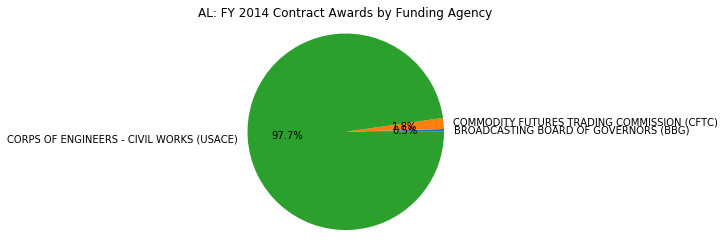

In [9]:
al_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "AL"]
al_14_no_null = al_14.dropna()
al_14_agency = al_14_no_null.groupby('funding_agency_name').sum()
al_14_agency = al_14_agency.reset_index()
al_14_agency = al_14_agency.head(3)
plt.pie(al_14_agency['total_dollars_obligated'], labels = [value for value in al_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("AL: FY 2014 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

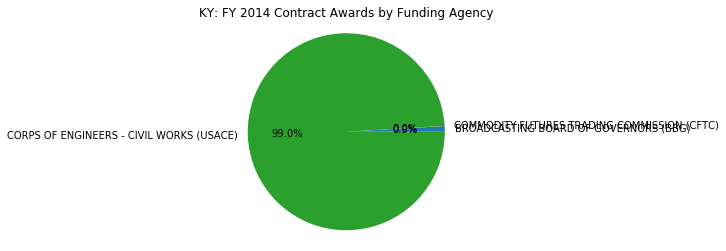

In [11]:
ky_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "KY"]
ky_14_no_null = ky_14.dropna()
ky_14_agency = ky_14_no_null.groupby('funding_agency_name').sum()
ky_14_agency = ky_14_agency.reset_index()
ky_14_agency = ky_14_agency.head(3)
plt.pie(ky_14_agency['total_dollars_obligated'], labels = [value for value in ky_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("KY: FY 2014 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

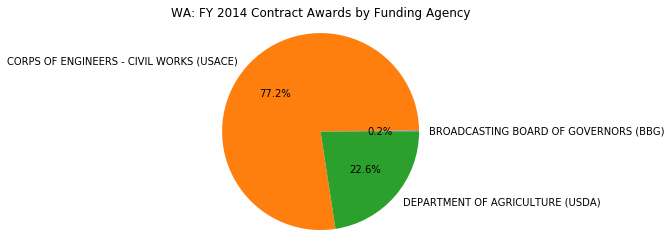

In [12]:
wa_14 = spending_14_clean.loc[spending_14_clean["recipient_state_code"] == "WA"]
wa_14_no_null = wa_14.dropna()
wa_14_agency = wa_14_no_null.groupby('funding_agency_name').sum()
wa_14_agency = wa_14_agency.reset_index()
wa_14_agency = wa_14_agency.head(3)
plt.pie(wa_14_agency['total_dollars_obligated'], labels = [value for value in wa_14_agency['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("WA: FY 2014 Contract Awards by Funding Agency")
plt.show